In [147]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio 
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.signal import butter, lfilter, filtfilt ,freqz

In [148]:
# Calculate Spectrogram by using SFTF method
def spectrogram_cal(data):
    n_fft = 2048       # Length of FFT window
    hop_length = 32   # Number of samples between frames
    win_length = 1024  # Length of the window
    window = 'hann'    # Windowing function

    # Compute the STFT
    spectrogram = librosa.stft(data, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))  # Convert to dB
    
    return spectrogram_db

In [149]:
# ----- 1-D discrete Fourier transforms ------
def audioFFT_cal (data,sr,N=10000):
    # N = Number of sample points
  
    T = 1.0 / sr   # sample spacing
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(data)
    Xf = fftfreq(N, T)[:N//2]
    #FFT_Amplitude = N * np.abs(yf[0:N//2])
    FFT_Amplitude = np.abs(yf[0:N//2])
    max_freq = np.argmax(N * np.abs(yf[0:N//2]))
    #print("High Amplitude Frequency :", max_freq)
    
    return Xf,FFT_Amplitude

In [150]:
# Load the audio file
audio_file = './dataset/train/Drone/5m-50m-ex6.wav'  # Replace with your audio file path
#audio_file = './dataset/train/No_Drone/เสียงธรรมชาติ(New_Sound)-ex19.wav'
#audio_file = './dataset/train/No_Drone/เสียงธรรมชาติ(New_Sound)-ex12.wav'
y, sr = librosa.load(audio_file)  # , duration=20)

y = y[:44000]
timesDuration = librosa.get_duration(y=y, sr=sr)

# normalize audio  
max_value = np.max(np.abs(y))       # Determine the maximum values
audio_normalize = y/max_value        # Use max_value and normalize sound data to get values between -1 & +1

print(f'Sampling Rate: {sr} Hz')
print(f'Audio Duration: {timesDuration:.0f} seconds')

Sampling Rate: 22050 Hz
Audio Duration: 2 seconds


In [151]:
Audio(data=audio_normalize, rate=sr)

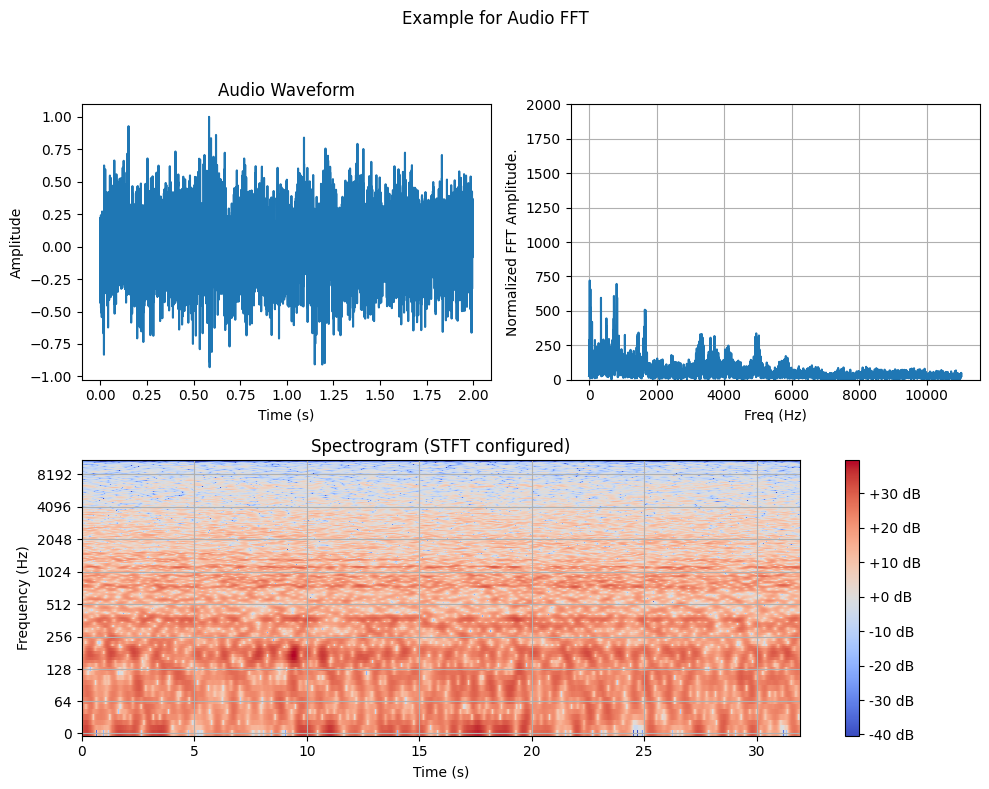

In [152]:
y = audio_normalize

plt.figure(figsize=(10, 8))
plt.suptitle(f'Example for Spectrogram')

# ----- Plot Audio Waveform  -----
plt.subplot(2, 2, 1)
plt.title(f'Audio Waveform')
plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# ----- Plot FFT  -----
xf,yf = audioFFT_cal(y,sr)    
plt.subplot(2, 2, 2)
plt.suptitle(f'Example for Audio FFT')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude.')
plt.ylim(0,2000)

# ------- Plot Spectrogram ---------
spectrogram_db = spectrogram_cal(y)
plt.subplot(2, 1, 2)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (STFT configured)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [153]:
# Audio Filter
def butter_highpass(cutoff, fs, order=5):
    nyq = fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

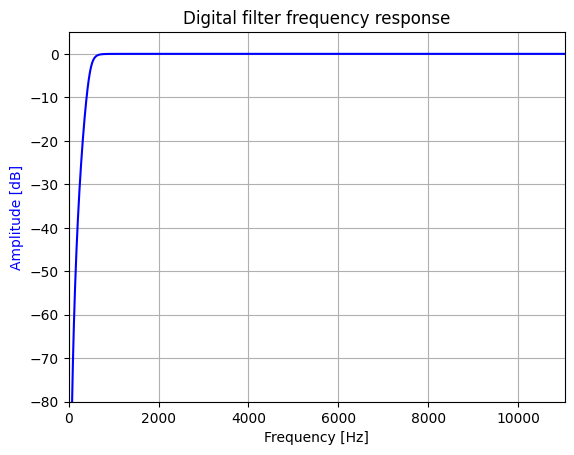

In [154]:
# High Pass filter
freq_cutoff = 500

b, a = butter_highpass(freq_cutoff, sr, order=5)
# Compute the frequency response of the filter
w, h = freqz(b, a, worN=5000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(sr*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-80, 5])
ax1.set_xlim([0, 0.5*sr])
ax1.grid()

plt.show()

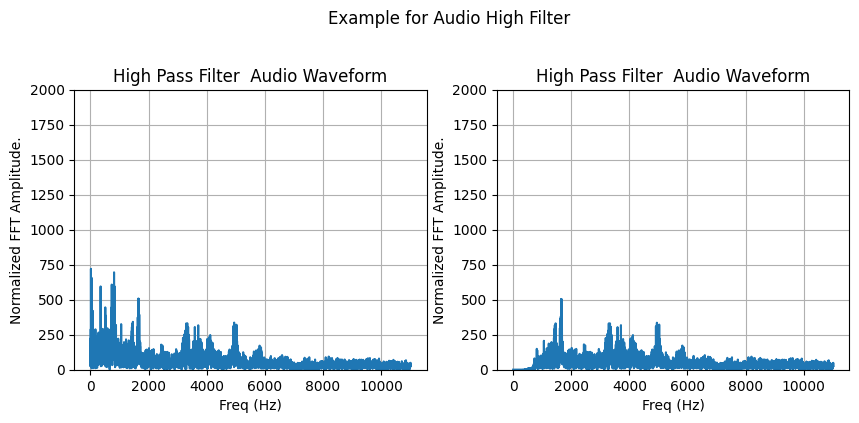

In [155]:
audio_HPF = butter_highpass_filter(audio_normalize,freq_cutoff,sr)

plt.figure(figsize=(10, 8))
plt.suptitle(f'Example for Audio High Filter')

# ----- Plot Audio Waveform  -----
xf,yf = audioFFT_cal(audio_normalize,sr)  
plt.subplot(2, 2, 1)
plt.title(f'High Pass Filter  Audio Waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude.')
plt.ylim(0,2000)

# ----- Plot FFT  -----
xf,yf = audioFFT_cal(audio_HPF,sr)    
plt.subplot(2, 2, 2)
plt.title(f'High Pass Filter  Audio Waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude.')
plt.ylim(0,2000)

plt.show()

In [156]:
Audio(data=audio_HPF, rate=sr)

In [157]:
Audio(data=audio_normalize, rate=sr)

Shape of spectrogram :(1025, 1376)


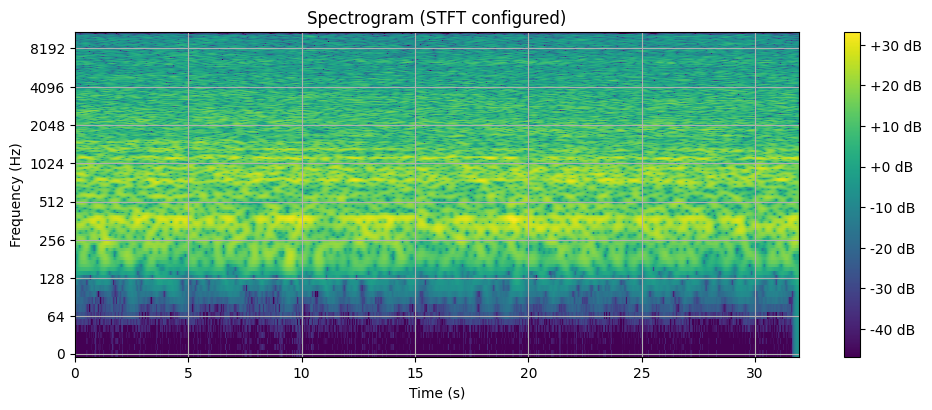

In [158]:
# ------- Plot Spectrogram ---------
spectrogram_db = spectrogram_cal(audio_HPF)
print("Shape of spectrogram :" + str(spectrogram_db.shape))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (STFT configured)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

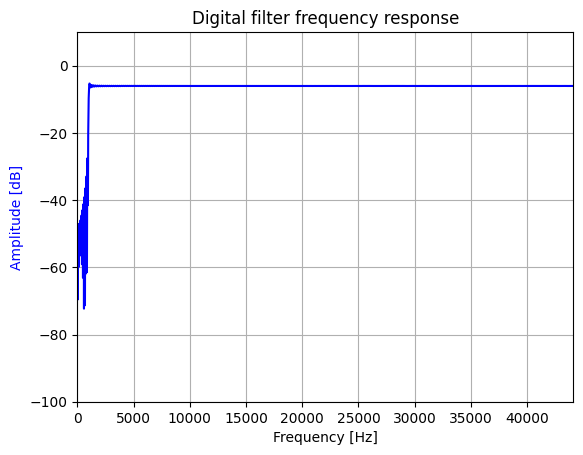

In [159]:

import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = sr*4  # Sample rate, Hz
cutoff = 1000  # Desired cutoff frequency, Hz
trans_width = 200  # Width of transition from pass band to stop band, Hz
numtaps = 1001  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='rectangular', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 2, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()

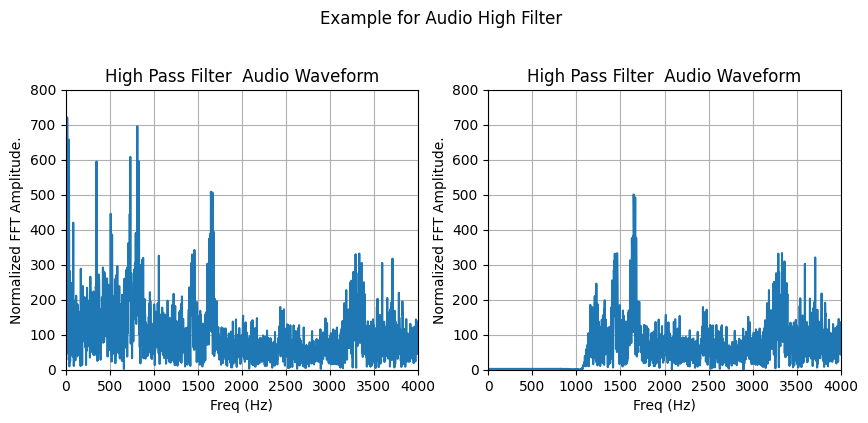

In [160]:
y = filtfilt(taps, 1, audio_normalize)

plt.figure(figsize=(10, 8))
plt.suptitle(f'Example for Audio High Filter')

# ----- Plot Audio Waveform  -----
xf,yf = audioFFT_cal(audio_normalize,sr)  
plt.subplot(2, 2, 1)
plt.title(f'High Pass Filter  Audio Waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude.')
plt.ylim(0,800)
plt.xlim(0,4000)

# ----- Plot FFT  -----
xf,yf = audioFFT_cal(y,sr)    
plt.subplot(2, 2, 2)
plt.title(f'High Pass Filter  Audio Waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude.')
plt.ylim(0,800)
plt.xlim(0,4000)

plt.show()

In [161]:
Audio(data=y, rate=sr)

In [162]:
Audio(data=audio_normalize, rate=sr)